## Breast cancer diagnostic

Attribute Information:

 - 1) ID number 
 - 2) Survived (1 yes, 0 no) 
 
 - 3-32.The following features 
 
     - a) Name
     - b) SibSp!
     - C) Parch 
     - d) Ticket
     - e) Fare
     - f) Cabin
     - g) Embarked


### Load libraries

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # for the check the error and accuracy of the model

### Python fundamentals

### Load Data

In [44]:
data = pd.read_csv("titanic.csv",header=0)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now lets look at the data

In [14]:
# Show columns info of data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Explore the Data now

In [15]:
data_collume = list(data.columns[0:12])
print(data_collume)


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


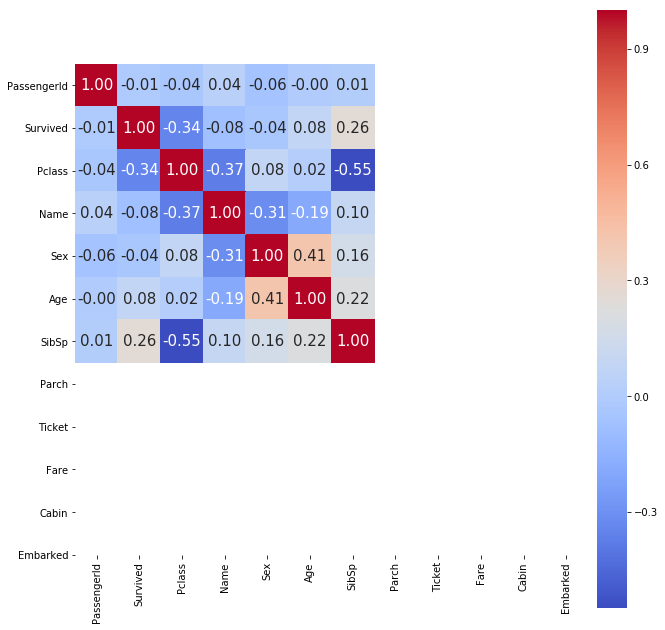

In [16]:
corr = data[data_collume].corr() # .corr is used for find corelation
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_collume, yticklabels= data_collume,
           cmap= 'coolwarm')

In [17]:
prediction_var = ['SibSp']


In [26]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)
train.head(5)

(623, 12)
(268, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S


In [46]:
train_X = train[prediction_var] # taking the training data input 
train_y = train.Survived # This is output of our training data
# same we have to do for test
test_X = test[prediction_var] # taking test data inputs
test_y = test.Survived   #output value of test data

train_length = train_X['SibSp'].count()

print('Size of the training set is', train_length)

train_X.head()

Size of the training set is 623


,SibSp,Parch,Embarked
383,1,0,S
341,3,2,S
455,0,0,C
170,0,0,S
426,1,0,S


In [47]:
metrics.accuracy_score(train_y, test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

ValueError: Found input variables with inconsistent numbers of samples: [623, 268]

In [48]:
train_X.describe()

,SibSp,Parch
count,623.000000,623.000000
mean,0.537721,0.398074
std,1.117576,0.834618
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,8.000000,6.000000


In [35]:
# For this part I don't know how to fix this error
def Die(dataset):
    predictions = [0]
    for index, record in dataset.iterrows():
        predictions.append(1)
    return predictions

predictions = Die(train_X)
metrics.accuracy_score(predictions, train_y)

ValueError: Found input variables with inconsistent numbers of samples: [624, 623]

In [49]:
def Survive(dataset):
    predictions = []
    for index, record in dataset.iterrows():
        predictions.append(0)
    return predictions

predictions = Survive(train_X)
metrics.accuracy_score(predictions, train_y)

0.6147672552166934

## Histogram
- How many times each value appears in dataset. This description is called the distribution of variable
- Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.
- Frequency = number of times each value appears
- Example: [1,1,1,1,2,2,2]. Frequency of 1 is four and frequency of 2 is three.

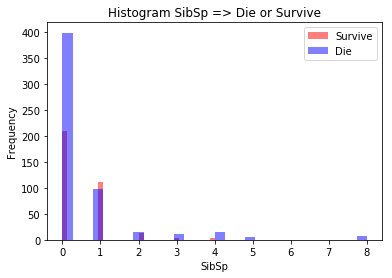

In [42]:
prediction_var = ['SibSp','Parch','Embarked']

plt.hist(data[data["Survived"] == 1].SibSp,bins=30,fc = (1,0,0,0.5),label = "Survive")
plt.hist(data[data["Survived"] == 0].SibSp,bins=30,fc = (0,0,1,0.5),label = "Die")
plt.legend()
plt.xlabel("SibSp")
plt.ylabel("Frequency")
plt.title("Histogram SibSp => Die or Survive")
plt.show()


In [43]:
def decisionTreeClassifierCS(dataset):
  


# For this part I cannot understand. I think I will learn this from you on Thursday

AttributeError: 'DataFrame' object has no attribute 'radius_mean'

In [72]:

# For this part I cannot understand. I think I will learn this from you on Thursday


0.9415204678362573

In [3]:
#
# For this part I cannot understand. I think I will learn this from you on Thursday

SyntaxError: invalid syntax (<ipython-input-3-f9542f3d53c3>, line 3)